In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score,roc_auc_score,plot_roc_curve,roc_curve,r2_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load dataset and convert into data
df = pd.read_csv('bigdatamart_Train[1].csv')
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [3]:
df.columns # Check columns name

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [4]:
print("train_data -------", df.shape) 

train_data ------- (8523, 12)


we have 8523 rows and 12 columns

In [5]:
# Check missing values
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

We have two column with missing values

    Item_Weight --> Continous column
    Outlet_Size --> Categorical Coloumn.

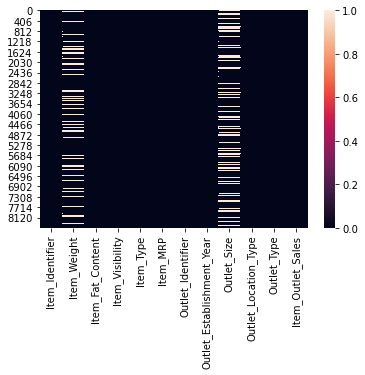

In [6]:
# Check missing value throw visulization
sns.heatmap(df.isna())
plt.show()

In [7]:
# Check datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


Key observation:
1. Catogorical data:
    1. Item_Identifier
    2. Item_Fat_Content
    3. Item_Type
    4. Outlet_Identifier
    5. Outlet_Establishment_Year
    6. Outlet_Size
    7. Outlet_Location_Type
    8. Outlet_Type

2. Continous Data:
    1. Item_Weight
    2. Item_Visibility
    3. Item_MRP
    4. Item_Outlet_Sales


In [8]:
# Statistic Summary
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [9]:
df['Item_Identifier'].value_counts()

FDG33    10
FDW13    10
FDF56     9
NCL31     9
FDV38     9
         ..
FDK57     1
FDN52     1
FDT35     1
FDQ60     1
FDO33     1
Name: Item_Identifier, Length: 1559, dtype: int64

In [10]:
df['Item_Identifier'].unique()

array(['FDA15', 'DRC01', 'FDN15', ..., 'NCF55', 'NCW30', 'NCW05'],
      dtype=object)

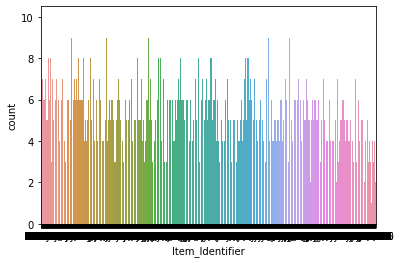

In [11]:
sns.countplot(df['Item_Identifier'])
plt.show()

In [12]:
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [13]:
df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [14]:
# we observed  that their is a spell error
df['Item_Fat_Content'].replace([ 'low fat', 'LF', 'reg'],['Low Fat','Low Fat', 'Regular'],inplace = True)

In [15]:
df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

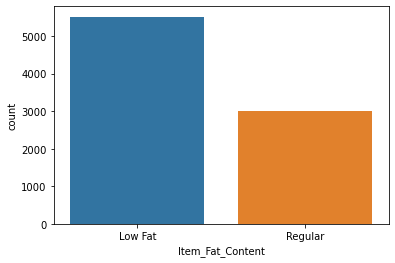

In [16]:
sns.countplot(df['Item_Fat_Content'])
plt.show()

In [17]:
# we observe  that Low fat items more than regular items

In [18]:
df['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

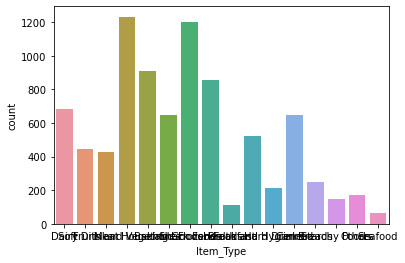

In [19]:
sns.countplot(df['Item_Type'])
plt.show()

In [20]:
df['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [21]:
df['Outlet_Identifier'].unique()

array(['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045',
       'OUT017', 'OUT046', 'OUT035', 'OUT019'], dtype=object)

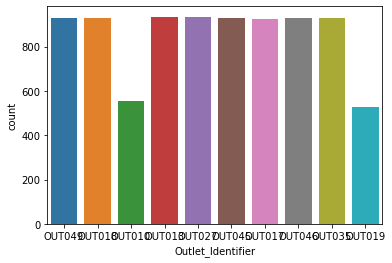

In [22]:
sns.countplot(df['Outlet_Identifier'])
plt.show()

In [23]:
df['Outlet_Identifier'].value_counts()

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [24]:
df['Outlet_Establishment_Year'].unique()

array([1999, 2009, 1998, 1987, 1985, 2002, 2007, 1997, 2004], dtype=int64)

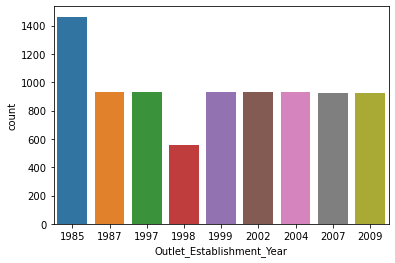

In [25]:
sns.countplot(df['Outlet_Establishment_Year'])
plt.show()

In [26]:
df['Outlet_Size'].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

We observe that Outlet_Size as nan value

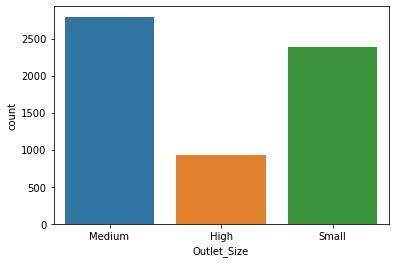

In [27]:
sns.countplot(df['Outlet_Size'])
plt.show()

In [28]:
df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [29]:
df['Outlet_Location_Type'].unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

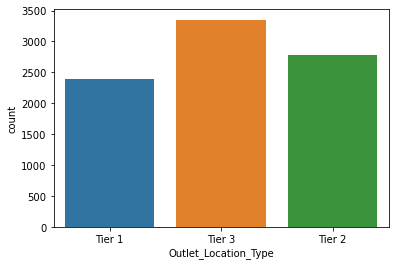

In [30]:
sns.countplot(df['Outlet_Location_Type'])
plt.show()

In [31]:
df['Outlet_Type'].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [32]:
# Now deal with missing value
df['Item_Weight'].fillna(df['Item_Weight'].mean(),inplace = True)
df['Outlet_Size'].fillna(df['Outlet_Size'].mode()[0],inplace = True)

In [33]:
# separate string and  Numerical data
features = df.columns
numerical_features = df._get_numeric_data().columns

object_features = list(set(features) - set(numerical_features))
object_features

['Item_Type',
 'Outlet_Type',
 'Item_Identifier',
 'Outlet_Identifier',
 'Outlet_Location_Type',
 'Item_Fat_Content',
 'Outlet_Size']

In [34]:
numerical_features

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

In [35]:
# Now convert string datatype to numrical datatype
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in object_features:
     df[i] = le.fit_transform(df[i])

In [36]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,1,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


In [37]:
# Check once again Statistics summary
df.describe()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,779.714889,12.857645,0.352693,0.066132,7.226681,140.992782,4.722281,1997.831867,1.170832,1.112871,1.201220,2181.288914
std,449.222377,4.226124,0.477836,0.051598,4.209990,62.275067,2.837201,8.371760,0.600327,0.812757,0.796459,1706.499616
min,0.000000,4.555000,0.000000,0.000000,0.000000,31.290000,0.000000,1985.000000,0.000000,0.000000,0.000000,33.290000
25%,395.500000,9.310000,0.000000,0.026989,4.000000,93.826500,2.000000,1987.000000,1.000000,0.000000,1.000000,834.247400
50%,783.000000,12.857645,0.000000,0.053931,6.000000,143.012800,5.000000,1999.000000,1.000000,1.000000,1.000000,1794.331000
75%,1167.000000,16.000000,1.000000,0.094585,10.000000,185.643700,7.000000,2004.000000,2.000000,2.000000,1.000000,3101.296400
max,1558.000000,21.350000,1.000000,0.328391,15.000000,266.888400,9.000000,2009.000000,2.000000,2.000000,3.000000,13086.964800


we observed the outliers present in the data and skewness present in the data.

In [38]:
# Now check correalation
cor = df.corr()
cor

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Identifier,1.000000,0.044518,-0.114660,-0.025482,-0.017973,0.012853,-0.008602,-0.012772,0.001389,0.003656,-0.001178,0.002869
Item_Weight,0.044518,1.000000,-0.021157,-0.012049,0.028015,0.024756,-0.007975,-0.008301,-0.007225,0.004088,-0.000566,0.011550
Item_Fat_Content,-0.114660,-0.021157,1.000000,0.047314,-0.139434,0.006063,0.000764,0.003151,-0.000622,-0.001598,0.002199,0.018719
Item_Visibility,-0.025482,-0.012049,0.047314,1.000000,-0.035249,-0.001315,-0.100439,-0.074834,0.069309,-0.028099,-0.173468,-0.128625
Item_Type,-0.017973,0.028015,-0.139434,-0.035249,1.000000,0.032651,0.001656,0.004970,-0.001859,0.003084,0.003053,0.017048
Item_MRP,0.012853,0.024756,0.006063,-0.001315,0.032651,1.000000,0.003319,0.005020,0.006059,0.000232,-0.001975,0.567574
Outlet_Identifier,-0.008602,-0.007975,0.000764,-0.100439,0.001656,0.003319,1.000000,0.079035,0.504603,-0.716176,0.099873,0.162325
Outlet_Establishment_Year,-0.012772,-0.008301,0.003151,-0.074834,0.004970,0.005020,0.079035,1.000000,0.193389,-0.089216,-0.122304,-0.049135
Outlet_Size,0.001389,-0.007225,-0.000622,0.069309,-0.001859,0.006059,0.504603,0.193389,1.000000,-0.614311,-0.201483,-0.086182
Outlet_Location_Type,0.003656,0.004088,-0.001598,-0.028099,0.003084,0.000232,-0.716176,-0.089216,-0.614311,1.000000,0.467219,0.089367


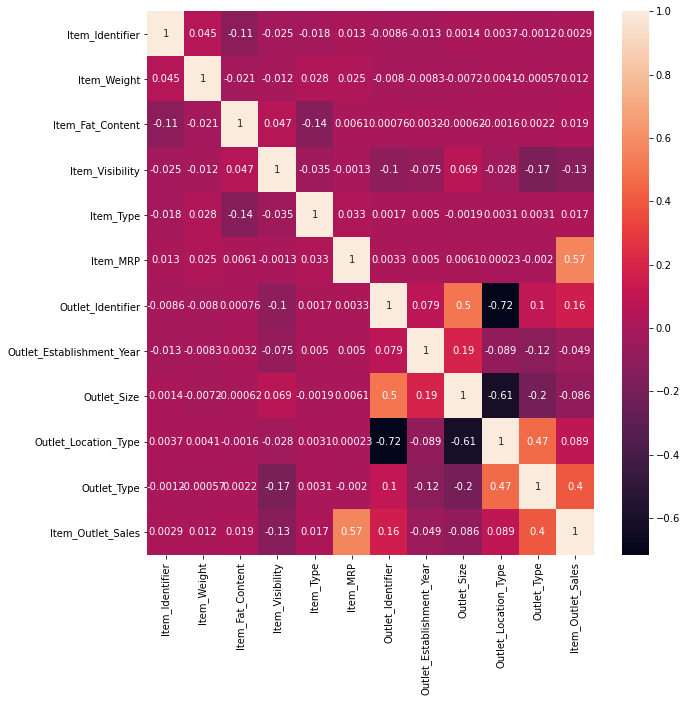

In [39]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot = True)
plt.show()

Key observation
Item _outlet_slaes has highest correaltion with item_mrp

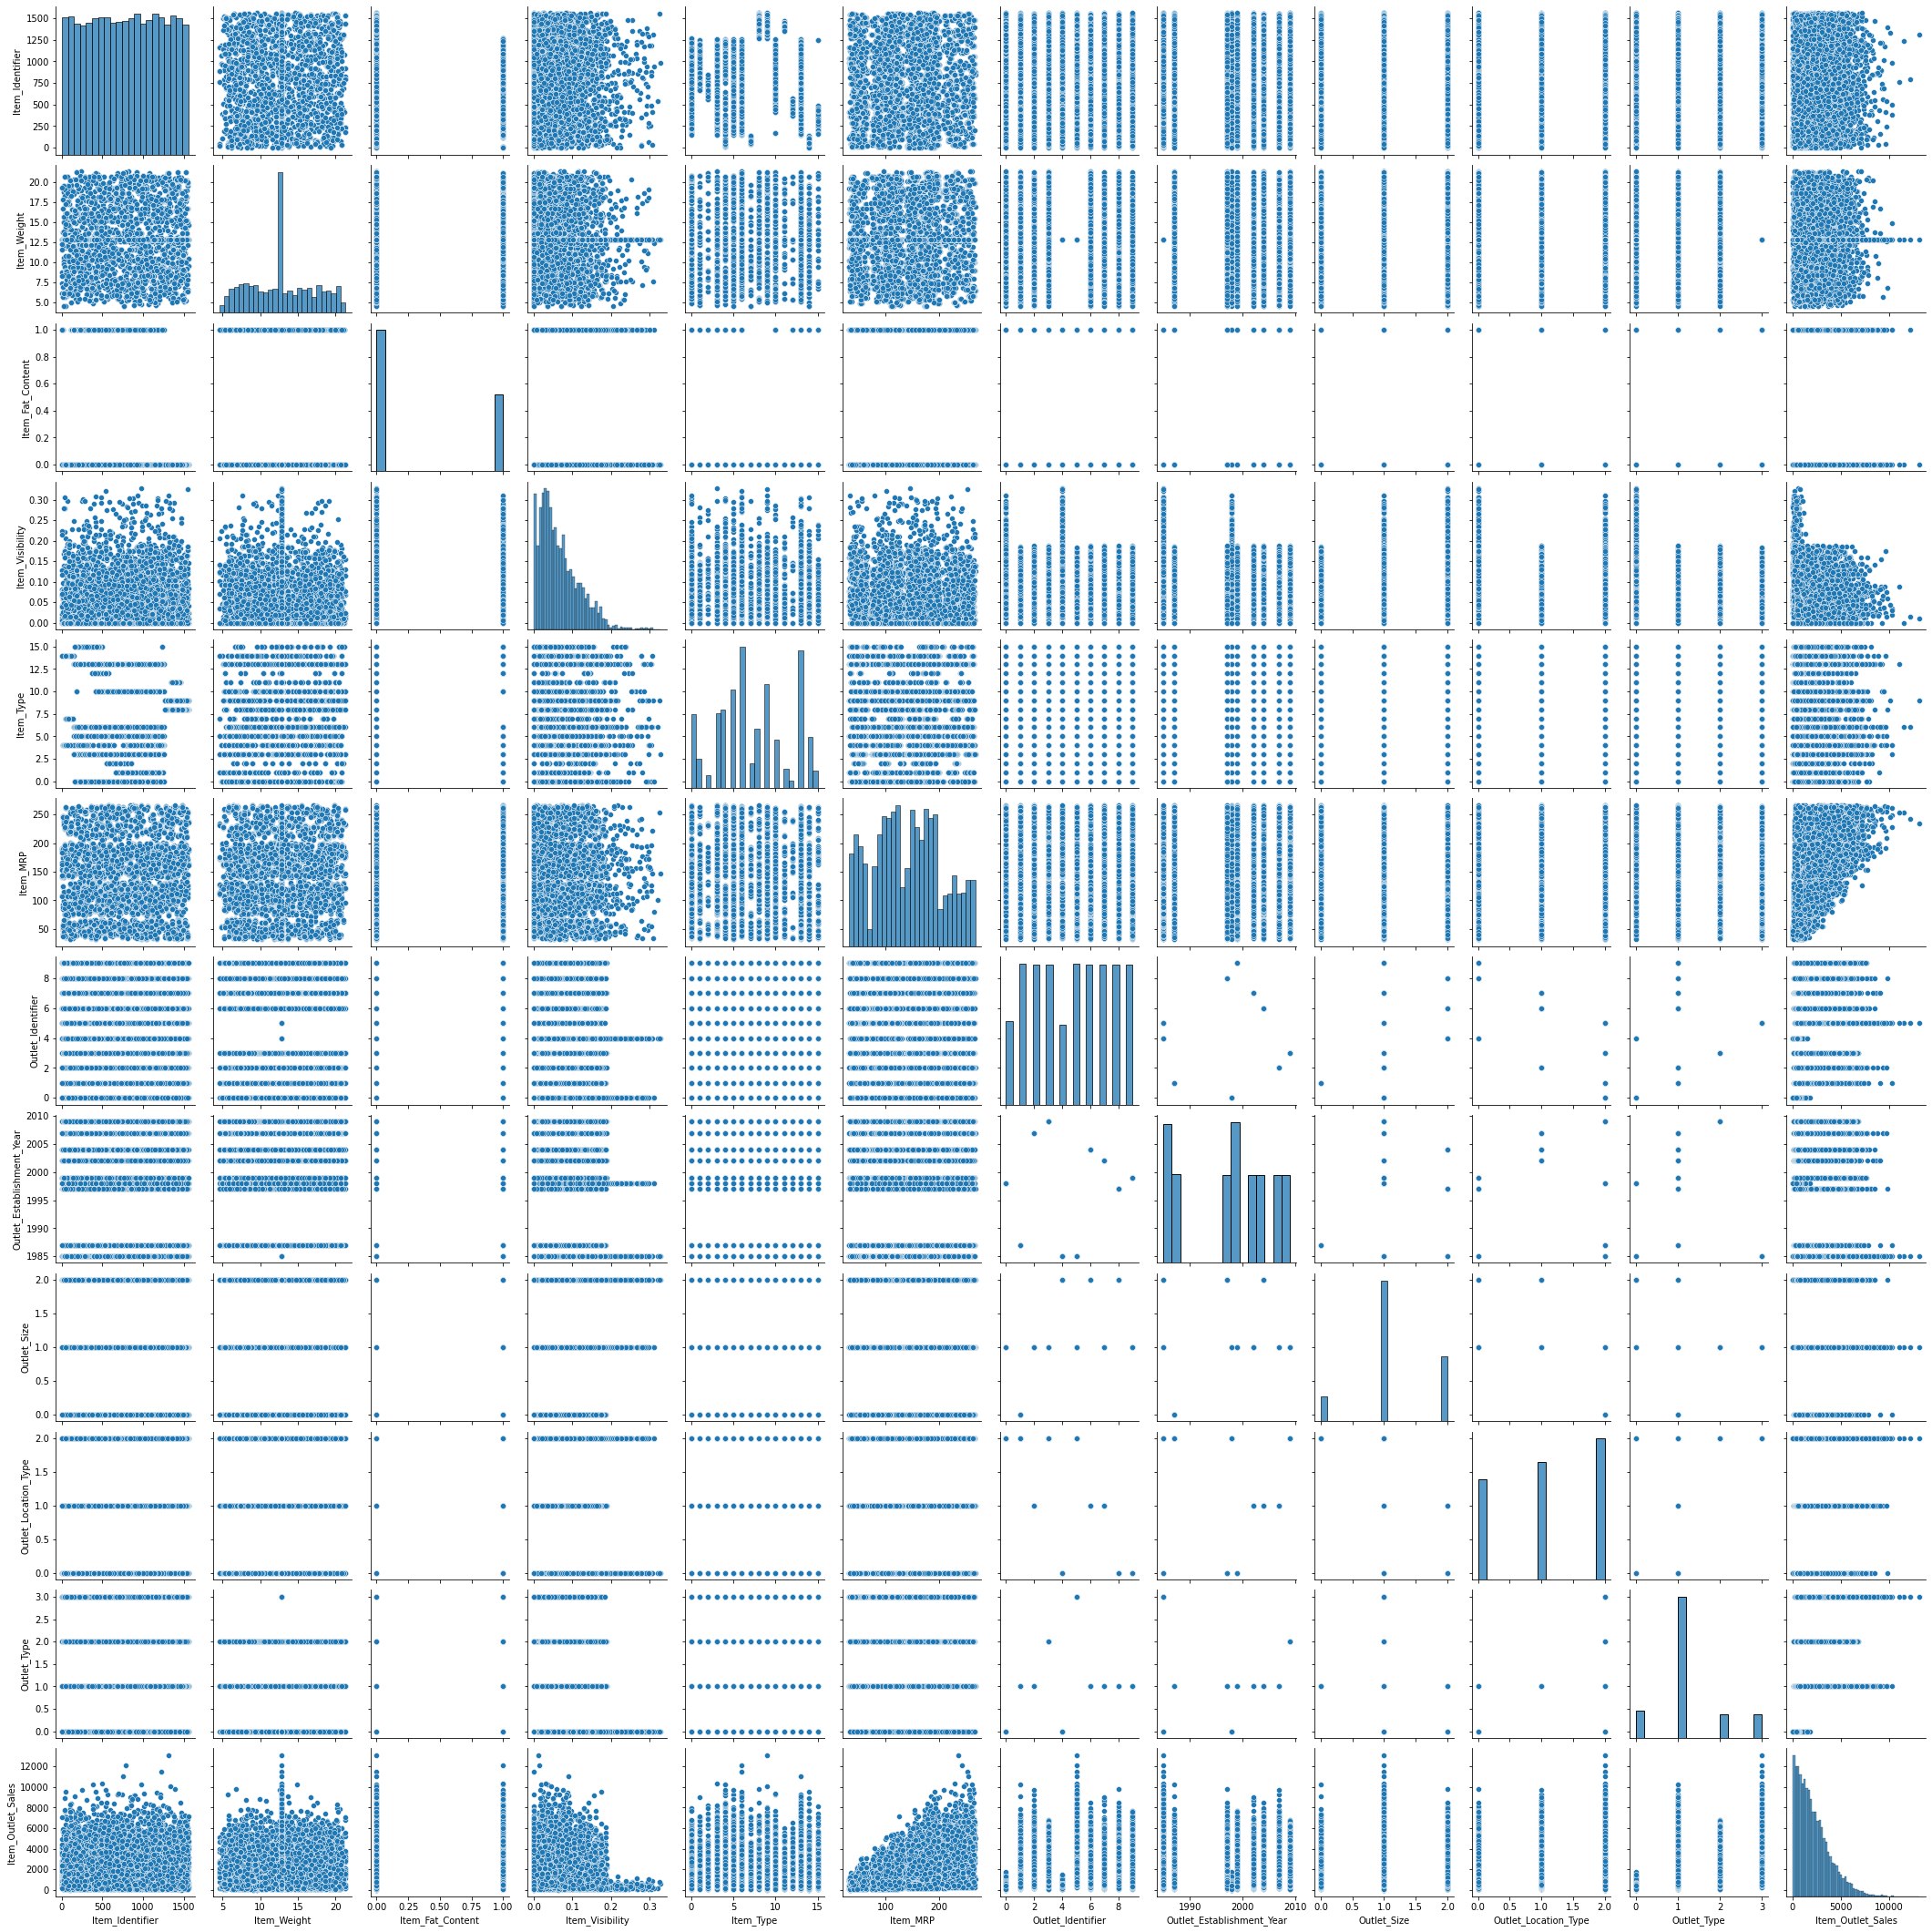

In [40]:
sns.pairplot(df)
plt.show()

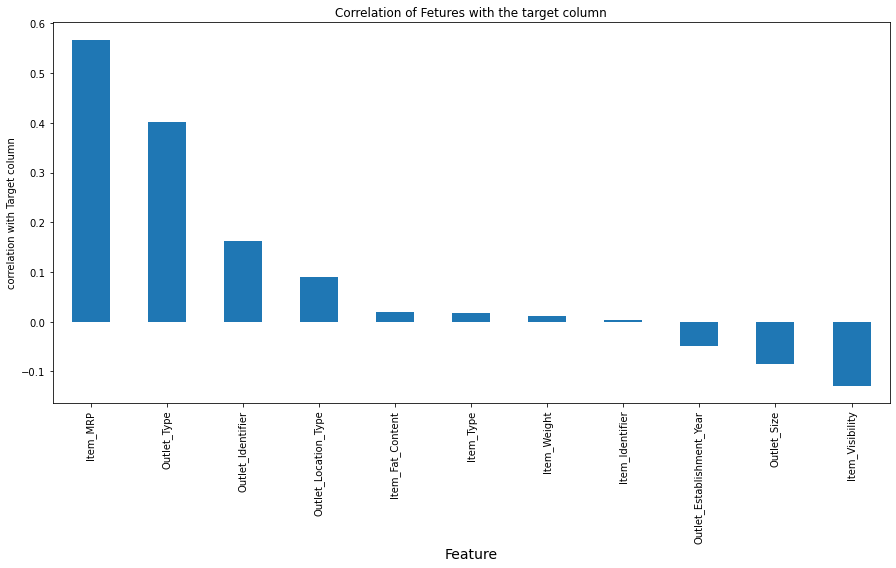

In [41]:
#Lets see the Correlation of all the Feature_variable with Target_Variable
plt.figure(figsize=(15,7))
df.corr()["Item_Outlet_Sales"].sort_values(ascending=False).drop(["Item_Outlet_Sales"]).plot.bar()
plt.xlabel("Feature", fontsize= 14)
plt.ylabel("correlation with Target column")
plt.title("Correlation of Fetures with the target column")
plt.show()


In [42]:
cor=pd.DataFrame(df.corr()["Item_Outlet_Sales"].sort_values(ascending=False)).drop(["Item_Outlet_Sales"])
cor

,Item_Outlet_Sales
Item_MRP,0.567574
Outlet_Type,0.401522
Outlet_Identifier,0.162325
Outlet_Location_Type,0.089367
Item_Fat_Content,0.018719
Item_Type,0.017048
Item_Weight,0.011550
Item_Identifier,0.002869
Outlet_Establishment_Year,-0.049135
Outlet_Size,-0.086182


we observed that Item_MRP,Outlet_Type has highly correalted

In [43]:
df.shape

(8523, 12)

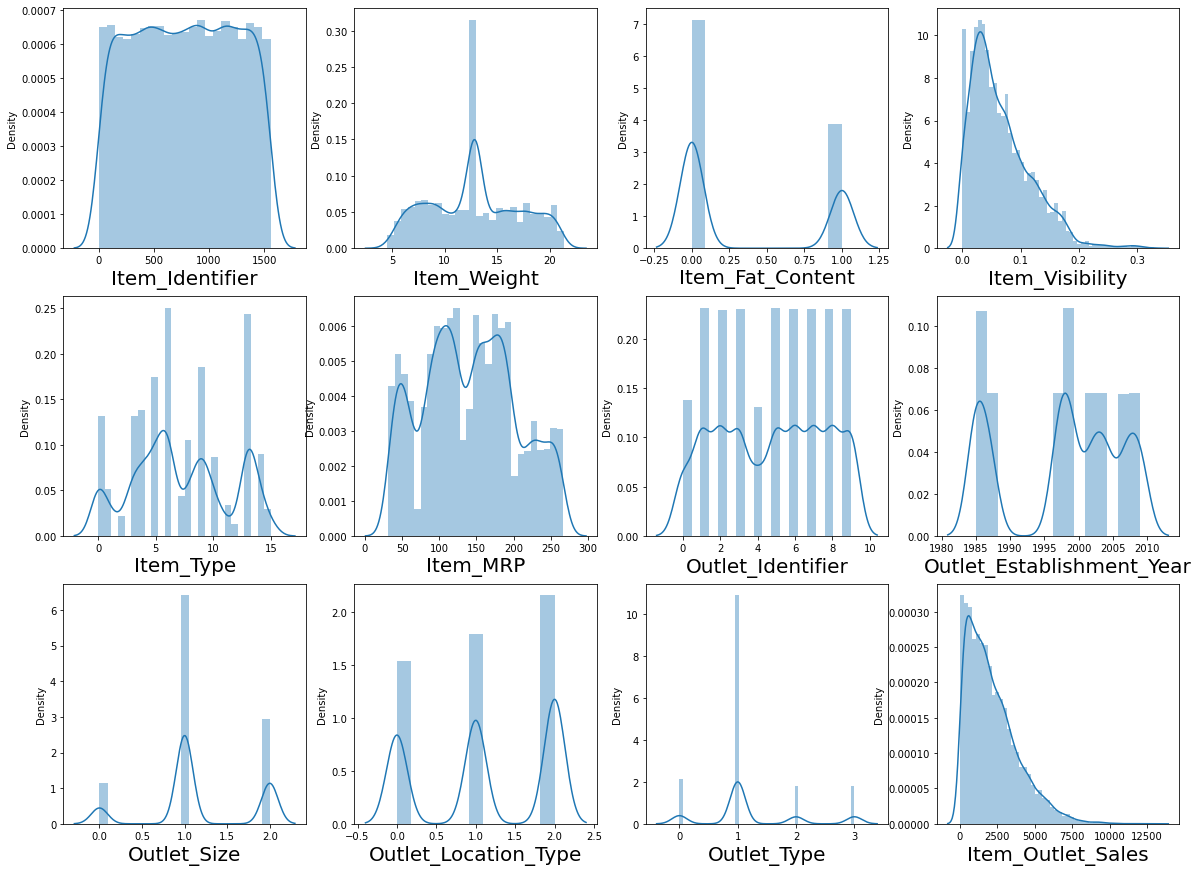

In [44]:
# Now check how data is visualize
plt.figure(figsize=(20,15))
graph=1
for columns in df:
    if graph<=12:
        ax =plt.subplot(3,4,graph)
        sns.distplot(df[columns])
        plt.xlabel(columns, fontsize = 20)
        graph+=1
plt.show()

we observed that some outlier are present in our dataset

In [45]:
df.skew()

Item_Identifier             -0.008877
Item_Weight                  0.090561
Item_Fat_Content             0.616705
Item_Visibility              1.167091
Item_Type                    0.101655
Item_MRP                     0.127202
Outlet_Identifier           -0.059861
Outlet_Establishment_Year   -0.396641
Outlet_Size                 -0.087072
Outlet_Location_Type        -0.209093
Outlet_Type                  0.927438
Item_Outlet_Sales            1.177531
dtype: float64

In [46]:
from scipy.stats import zscore

z= np.abs(zscore(df))
threshold= 3
df_new = df[(z < 3).all(axis=1)]

In [47]:
df_new

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.300,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.920,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.500,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.200,1,0.000000,6,182.0950,0,1998,1,2,0,732.3800
4,1297,8.930,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,370,6.865,0,0.056783,13,214.5218,1,1987,0,2,1,2778.3834
8519,897,8.380,1,0.046982,0,108.1570,7,2002,1,1,1,549.2850
8520,1357,10.600,0,0.035186,8,85.1224,6,2004,2,1,1,1193.1136
8521,681,7.210,1,0.145221,13,103.1332,3,2009,1,2,2,1845.5976


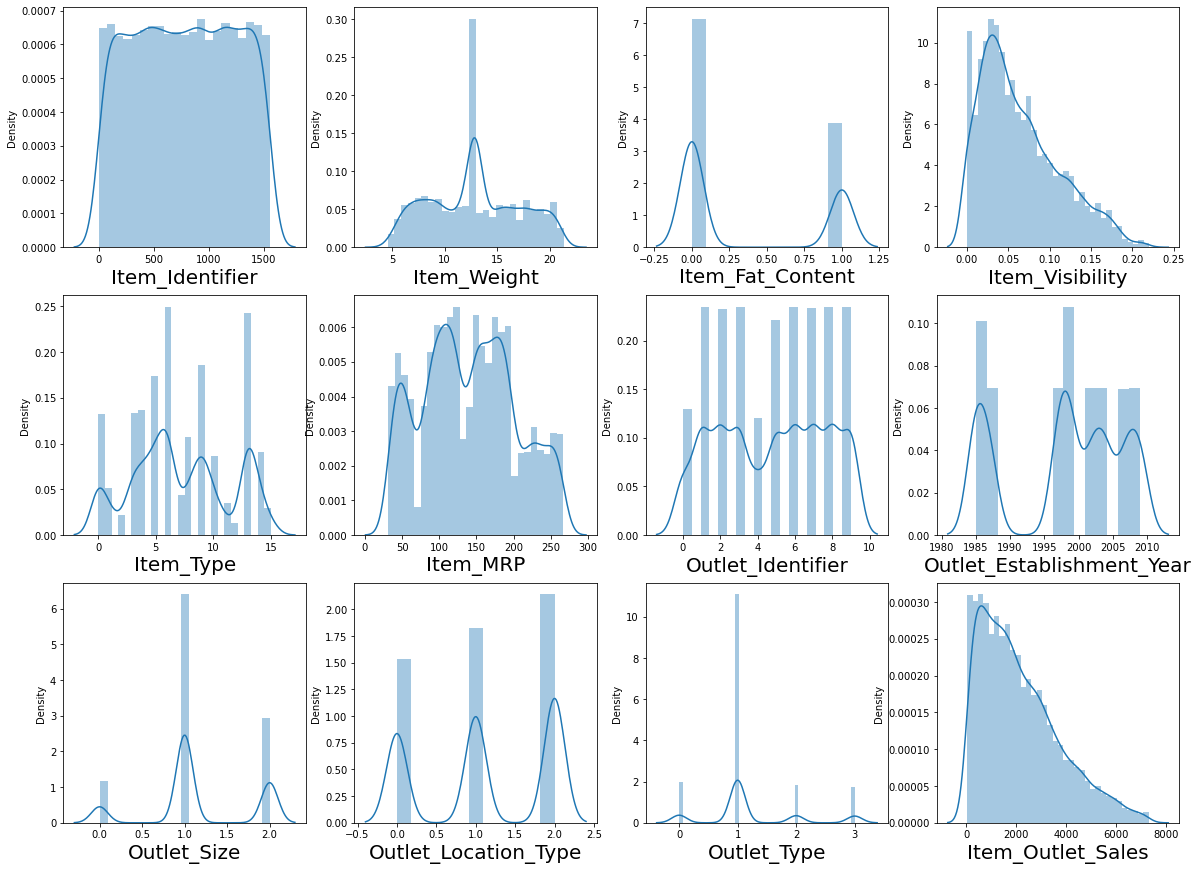

In [48]:
# Now check how data is visualize
plt.figure(figsize=(20,15))
graph=1
for columns in df_new:
    if graph<=12:
        ax =plt.subplot(3,4,graph)
        sns.distplot(df_new[columns])
        plt.xlabel(columns, fontsize = 20)
        graph+=1
plt.show()

In [49]:
# Now split  data  into Features and label
X=df_new.drop(["Item_Outlet_Sales"], axis = 1)
y=df_new['Item_Outlet_Sales']

In [51]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
scaler.fit_transform(df_new)

array([[-1.38690137, -0.8371775 , -0.73664489, ..., -1.37034498,
        -0.25983859,  1.01302592],
       [-1.71567222, -1.63203555,  1.35750619, ...,  1.09905991,
         1.02213428, -1.07025102],
       [-0.2628605 ,  1.09117635, -0.73664489, ..., -1.37034498,
        -0.25983859, -0.02355605],
       ...,
       [ 1.28102962, -0.53146287, -0.73664489, ..., -0.13564253,
        -0.25983859, -0.59578301],
       [-0.22065343, -1.32867257,  1.35750619, ...,  1.09905991,
         1.02213428, -0.18283572],
       [-1.62237238,  0.45623057, -0.73664489, ..., -1.37034498,
        -0.25983859, -0.86630562]])

In [52]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import cross_val_score, cross_val_predict, cross_validate
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error

In [53]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state = 637)
regression = LinearRegression()
regression.fit(x_train,y_train)
y_pred = regression.predict(x_test)


regression_score = r2_score(y_test,y_pred)
print('R2 Score ----->',regression_score)

regression_rmse=np.sqrt(mean_squared_error(y_test, y_pred))
print('Root Mean square Error ----->',regression_rmse)

knn_mse = mean_squared_error(y_test, y_pred)
print('mean_squared_error ----->',regression_rmse)

test_score = regression.score(x_test, y_test)
print('Test Score ----->',test_score)

# Check model is overfitted or not
regression_csv = cross_val_score(LinearRegression(),X,y, cv=5).mean()
print('cross_validation_score ----->',regression_csv)

R2 Score -----> 0.4968469826145866
Root Mean square Error -----> 1107.1658526407984
mean_squared_error -----> 1107.1658526407984
Test Score -----> 0.4968469826145866
cross_validation_score -----> 0.4970789373026017


In [54]:
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor

In [55]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor()
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)

knn_score = r2_score(y_test,y_pred)
print('R2 Score ----->',knn_score)

knn_rmse=np.sqrt(mean_squared_error(y_test, y_pred))
print('Root Mean square Error ----->',knn_rmse)

knn_mse = mean_squared_error(y_test, y_pred)
print('mean_squared_error ----->',knn_rmse)

test_score = knn.score(x_test, y_test)
print('Test Score ----->',test_score)

# Check model is overfitted or not
knn_csv = cross_val_score(KNeighborsRegressor(),X,y,cv=5).mean()
print('cross_validation_score ----->',knn_csv)


R2 Score -----> 0.19057477697027203
Root Mean square Error -----> 1404.2712638855996
mean_squared_error -----> 1404.2712638855996
Test Score -----> 0.19057477697027203
cross_validation_score -----> 0.19647924356610036


In [56]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()
dtr.fit(x_train, y_train)
y_pred = dtr.predict(x_test)

dtr_score = r2_score(y_test,y_pred)
print('R2 Score ----->',dtr_score)

dtr_rmse=np.sqrt(mean_squared_error(y_test, y_pred))
print('Root Mean square Error ----->',dtr_rmse)

dtr_mse = mean_squared_error(y_test, y_pred)
print('mean_squared_error ----->',dtr_rmse)

dtr_test_score = knn.score(x_test, y_test)
print('Test Score ----->',dtr_score)

# Check model is overfitted or not
dtr_csv = cross_val_score(DecisionTreeRegressor(),X,y, cv=5).mean()
print('cross_validation_score ----->',dtr_csv)


R2 Score -----> 0.07644327909408877
Root Mean square Error -----> 1500.010947134461
mean_squared_error -----> 1500.010947134461
Test Score -----> 0.07644327909408877
cross_validation_score -----> 0.1249007344535158


In [57]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()
rfr.fit(x_train, y_train)
y_pred = rfr.predict(x_test)

rfr_score = r2_score(y_test,y_pred)
print('R2 Score ----->',rfr_score)

rfr_rmse=np.sqrt(mean_squared_error(y_test, y_pred))
print('Root Mean square Error ----->',rfr_rmse)

rfr_mse = mean_squared_error(y_test, y_pred)
print('mean_squared_error ----->',rfr_rmse)

rfr_test_score = knn.score(x_test, y_test)
print('Test Score ----->',rfr_score)


# Check model is overfitted or not
rfr_csv = cross_val_score(RandomForestRegressor(),X,y, cv=5).mean()
print('cross_validation_score ----->',rfr_csv)
print('difference',rfr_score - rfr_csv )

R2 Score -----> 0.5106535490466746
Root Mean square Error -----> 1091.8698237340827
mean_squared_error -----> 1091.8698237340827
Test Score -----> 0.5106535490466746
cross_validation_score -----> 0.5347654460086998
difference -0.024111896962025203


In [58]:
from sklearn.svm import SVR

svr = SVR()
svr.fit(x_train, y_train)
y_pred = svr.predict(x_test)


svr_score = r2_score(y_test,y_pred)
print('R2 Score ----->',svr_score)

svr_rmse=np.sqrt(mean_squared_error(y_test, y_pred))
print('Root Mean square Error ----->',svr_rmse)

svr_mse = mean_squared_error(y_test, y_pred)
print('mean_squared_error ----->',svr_rmse)

svr_test_score = knn.score(x_test, y_test)
print('Test Score ----->',svr_score)

# Check model is overfitted or not
svr_csv = cross_val_score(SVR(),X,y, cv=5).mean()
print('cross_validation_score ----->',svr_csv)

R2 Score -----> -0.04175810304202976
Root Mean square Error -----> 1593.1111807883449
mean_squared_error -----> 1593.1111807883449
Test Score -----> -0.04175810304202976
cross_validation_score -----> -0.04326886958298211


In [59]:
from sklearn.linear_model import Lasso,LassoCV,Ridge,RidgeCV
lasscv = LassoCV(alphas = None,cv =10, max_iter = 100000, normalize = True)
lasscv.fit(x_train, y_train)

LassoCV(cv=10, max_iter=100000, normalize=True)

In [60]:
# find best alpha
alpha = lasscv.alpha_
alpha

0.049361564222210066

In [61]:
lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train, y_train)

Lasso(alpha=0.049361564222210066)

In [62]:
lasso_score = lasso_reg.score(x_test, y_test)
lasso_score

0.49680799451953994

In [63]:
# Using RidgeCV
alphas = np.random.uniform(low=0, high=10, size=(50,))
ridgecv = RidgeCV(alphas = alphas,cv=10,normalize = True)
ridgecv.fit(x_train, y_train)
ridgecv.alpha_

0.02161447826934837

In [64]:
ridge_model = Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(x_train, y_train)
ridge_score = ridge_model.score(x_test, y_test)
print('ridge_score', ridge_score)

ridge_score 0.49684477823071516


In [65]:
models = pd.DataFrame({'Classifier':['Linear Regression', 'KNN', 'Decision Tree','Random Forest','Support Vector Machines', 'lasscv',
               'ridge_model'],
                      'Score':[regression_score,knn_score,dtr_score,rfr_score,svr_score,lasso_score,ridge_score]})
models.sort_values(by='Score',ascending=False)

,Classifier,Score
3,Random Forest,0.510654
0,Linear Regression,0.496847
6,ridge_model,0.496845
5,lasscv,0.496808
1,KNN,0.190575
2,Decision Tree,0.076443
4,Support Vector Machines,-0.041758


In [66]:
# Conclusion : we  Linear Regression Model has 49 score  and also give least difference

Now we go for Hyperparameter Tunning

In [68]:
param_grid = {'fit_intercept' : [True, False],'normalize' : [True, False],'copy_X':[True, False],
             'positive':[True, False]}

In [71]:
grid_search = GridSearchCV(LinearRegression(), param_grid = param_grid, cv = 5,n_jobs = -1 )

In [72]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=LinearRegression(), n_jobs=-1,
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'normalize': [True, False],
                         'positive': [True, False]})

In [73]:
best_parameters = grid_search.best_params_


In [74]:
regression = LinearRegression(copy_X = True, fit_intercept = False, normalize = True, positive = False)
regression.fit(x_train, y_train)
reg_score = regression.score(x_train, y_train)
print('Training_score',reg_score)

Training_score 0.4993239470307874


In [77]:
y_pred = regression.predict(x_test)

regression_score = r2_score(y_test,y_pred)
print('R2 Score ----->',regression_score)

regression_rmse=np.sqrt(mean_squared_error(y_test, y_pred))
print('Root Mean square Error ----->',regression_rmse)

knn_mse = mean_squared_error(y_test, y_pred)
print('mean_squared_error ----->',regression_rmse)

test_score = regression.score(x_test, y_test)
print('Test Score ----->',test_score)


R2 Score -----> 0.49661755107018424
Root Mean square Error -----> 1107.4182508297704
mean_squared_error -----> 1107.4182508297704
Test Score -----> 0.49661755107018424


conclusion  Hyperparameter Tuning LinearRegression score 49%.

In [80]:
#Saving The Model
import joblib
joblib.dump(regression,"bigdatamart_Train[1].csv'.pkl")


["bigdatamart_Train[1].csv'.pkl"]

In [81]:
data = pd.read_csv('bigdatamart_Test[1].csv')
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [82]:
# Check columns names
data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [83]:
# Check data shape
data.shape

(5681, 11)

 we have 5681 rows and 11 columns in our dataset

In [85]:
# Check datatype
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


#Key observation:
1. Catogorical data:
    1. Item_Identifier
    2. Item_Fat_Content
    3. Item_Type
    4. Outlet_Identifier
    5. Outlet_Size
    6. Outlet_Location_Type
    7. Outlet_Type

2. Continous Data:
    1. Item_Weight
    2. Item_Visibility
    3. Item_MRP
    4. Outlet_Establishment_Year

In [90]:
# Check missing values
data.isna().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

We have two column with missing values

    Item_Weight --> Continous column
    Outlet_Size --> Categorical Coloumn.

In [91]:
# Statistic Summary
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


In [92]:
# we observe that some skewness present in our dataset

In [93]:
data['Item_Identifier'].value_counts()

FDP15    8
FDN52    8
FDW10    8
FDZ50    8
FDQ60    8
        ..
NCL29    1
FDF52    1
FDY57    1
FDT40    1
FDV60    1
Name: Item_Identifier, Length: 1543, dtype: int64

In [94]:
data['Item_Identifier'].unique()

array(['FDW58', 'FDW14', 'NCN55', ..., 'NCI29', 'FDP28', 'FDF04'],
      dtype=object)

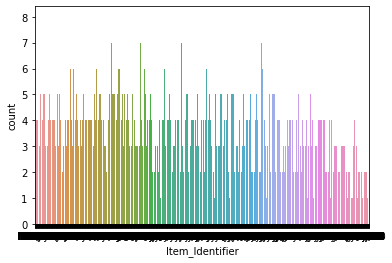

In [95]:
sns.countplot(data['Item_Identifier'])
plt.show()

In [96]:
data['Item_Fat_Content'].value_counts()

Low Fat    3396
Regular    1935
LF          206
reg          78
low fat      66
Name: Item_Fat_Content, dtype: int64

In [97]:
data['Item_Fat_Content'].unique()

array(['Low Fat', 'reg', 'Regular', 'LF', 'low fat'], dtype=object)

In [98]:
# we observed  that their is a spell error
data['Item_Fat_Content'].replace([ 'low fat', 'LF', 'reg'],['Low Fat','Low Fat', 'Regular'],inplace = True)

In [99]:
data['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

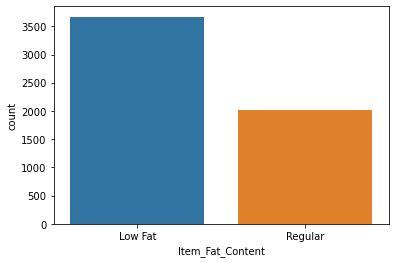

In [100]:
sns.countplot(data['Item_Fat_Content'])
plt.show()

#we observe  that Low fat items more than regular items

In [101]:
data['Item_Type'].unique()

array(['Snack Foods', 'Dairy', 'Others', 'Fruits and Vegetables',
       'Baking Goods', 'Health and Hygiene', 'Breads', 'Hard Drinks',
       'Seafood', 'Soft Drinks', 'Household', 'Frozen Foods', 'Meat',
       'Canned', 'Starchy Foods', 'Breakfast'], dtype=object)

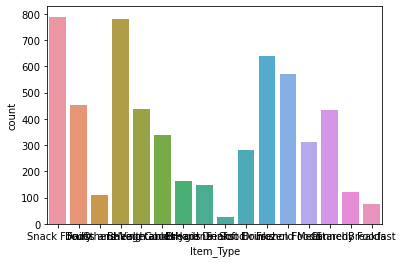

In [102]:
sns.countplot(data['Item_Type'])
plt.show()

In [103]:
data['Item_Type'].value_counts()

Snack Foods              789
Fruits and Vegetables    781
Household                638
Frozen Foods             570
Dairy                    454
Baking Goods             438
Canned                   435
Health and Hygiene       338
Meat                     311
Soft Drinks              281
Breads                   165
Hard Drinks              148
Starchy Foods            121
Others                   111
Breakfast                 76
Seafood                   25
Name: Item_Type, dtype: int64

In [104]:
data['Outlet_Identifier'].unique()

array(['OUT049', 'OUT017', 'OUT010', 'OUT027', 'OUT046', 'OUT018',
       'OUT045', 'OUT019', 'OUT013', 'OUT035'], dtype=object)

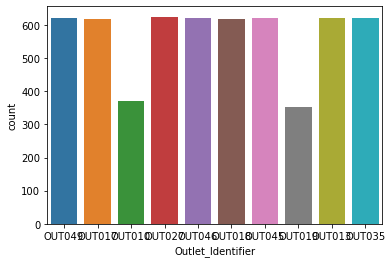

In [105]:
sns.countplot(data['Outlet_Identifier'])
plt.show()

In [106]:
data['Outlet_Identifier'].value_counts()

OUT027    624
OUT013    621
OUT049    620
OUT046    620
OUT035    620
OUT045    619
OUT018    618
OUT017    617
OUT010    370
OUT019    352
Name: Outlet_Identifier, dtype: int64

In [107]:
data['Outlet_Establishment_Year'].unique()

array([1999, 2007, 1998, 1985, 1997, 2009, 2002, 1987, 2004], dtype=int64)

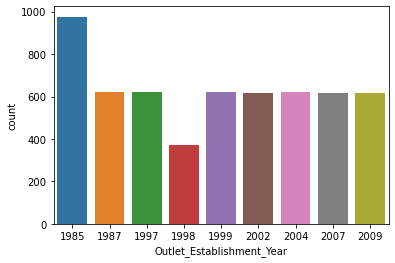

In [108]:
sns.countplot(data['Outlet_Establishment_Year'])
plt.show()

In [109]:
data['Outlet_Size'].unique()

array(['Medium', nan, 'Small', 'High'], dtype=object)

We observe that Outlet_Size as nan value

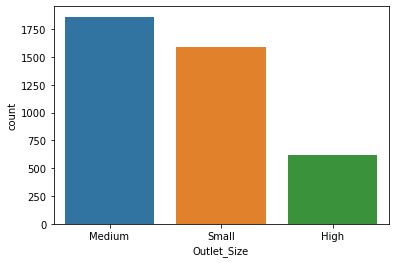

In [110]:
sns.countplot(data['Outlet_Size'])
plt.show()

In [111]:
data['Outlet_Size'].value_counts()

Medium    1862
Small     1592
High       621
Name: Outlet_Size, dtype: int64

In [112]:
data['Outlet_Location_Type'].unique()

array(['Tier 1', 'Tier 2', 'Tier 3'], dtype=object)

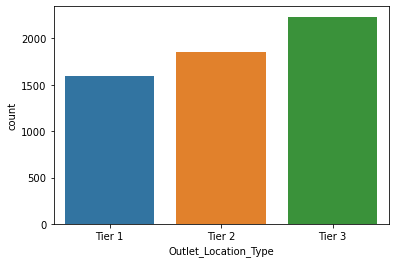

In [113]:
sns.countplot(data['Outlet_Location_Type'])
plt.show()

In [114]:
data['Outlet_Type'].unique()

array(['Supermarket Type1', 'Grocery Store', 'Supermarket Type3',
       'Supermarket Type2'], dtype=object)

In [115]:
# Now deal with missing value
data['Item_Weight'].fillna(data['Item_Weight'].mean(),inplace = True)
data['Outlet_Size'].fillna(data['Outlet_Size'].mode()[0],inplace = True)

In [116]:
# separate string and  Numberical data
features = data.columns
numerical_features = data._get_numeric_data().columns

object_features = list(set(features) - set(numerical_features))
object_features

['Item_Type',
 'Outlet_Type',
 'Item_Identifier',
 'Outlet_Identifier',
 'Outlet_Location_Type',
 'Item_Fat_Content',
 'Outlet_Size']

In [117]:
# Now convert string datatype to numrical datatype
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in object_features:
     data[i] = le.fit_transform(data[i])

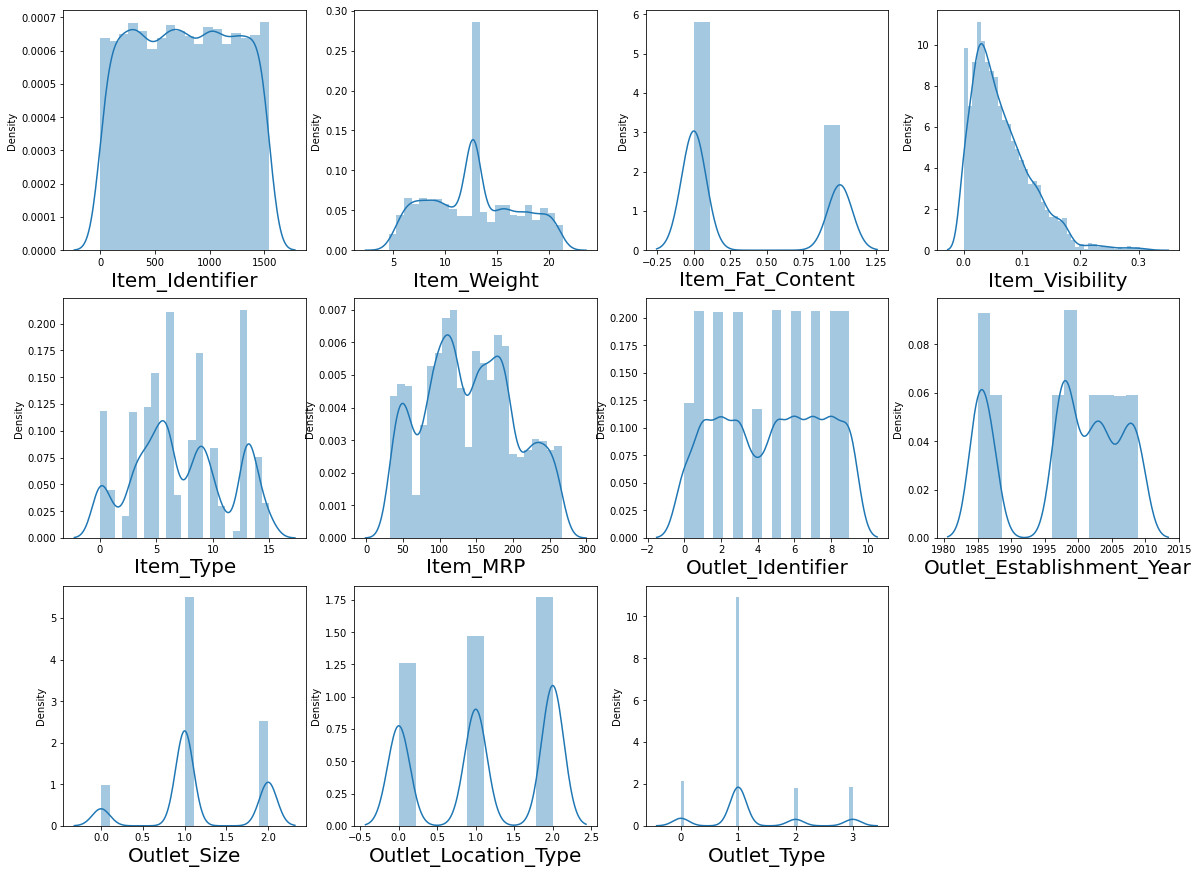

In [118]:
## Now check how data is visualize
plt.figure(figsize=(20,15))
graph=1
for columns in data:
    if graph<=11:
        ax =plt.subplot(3,4,graph)
        sns.distplot(data[columns])
        plt.xlabel(columns, fontsize = 20)
        graph+=1
plt.show()

In [119]:
data.skew()

Item_Identifier             -0.000020
Item_Weight                  0.142813
Item_Fat_Content             0.609223
Item_Visibility              1.238312
Item_Type                    0.096486
Item_MRP                     0.136182
Outlet_Identifier           -0.060209
Outlet_Establishment_Year   -0.396306
Outlet_Size                 -0.087108
Outlet_Location_Type        -0.209049
Outlet_Type                  0.927446
dtype: float64

In [120]:
from sklearn.preprocessing import power_transform
new_data = power_transform(data)
new_data =pd.DataFrame(new_data,columns= data.columns)


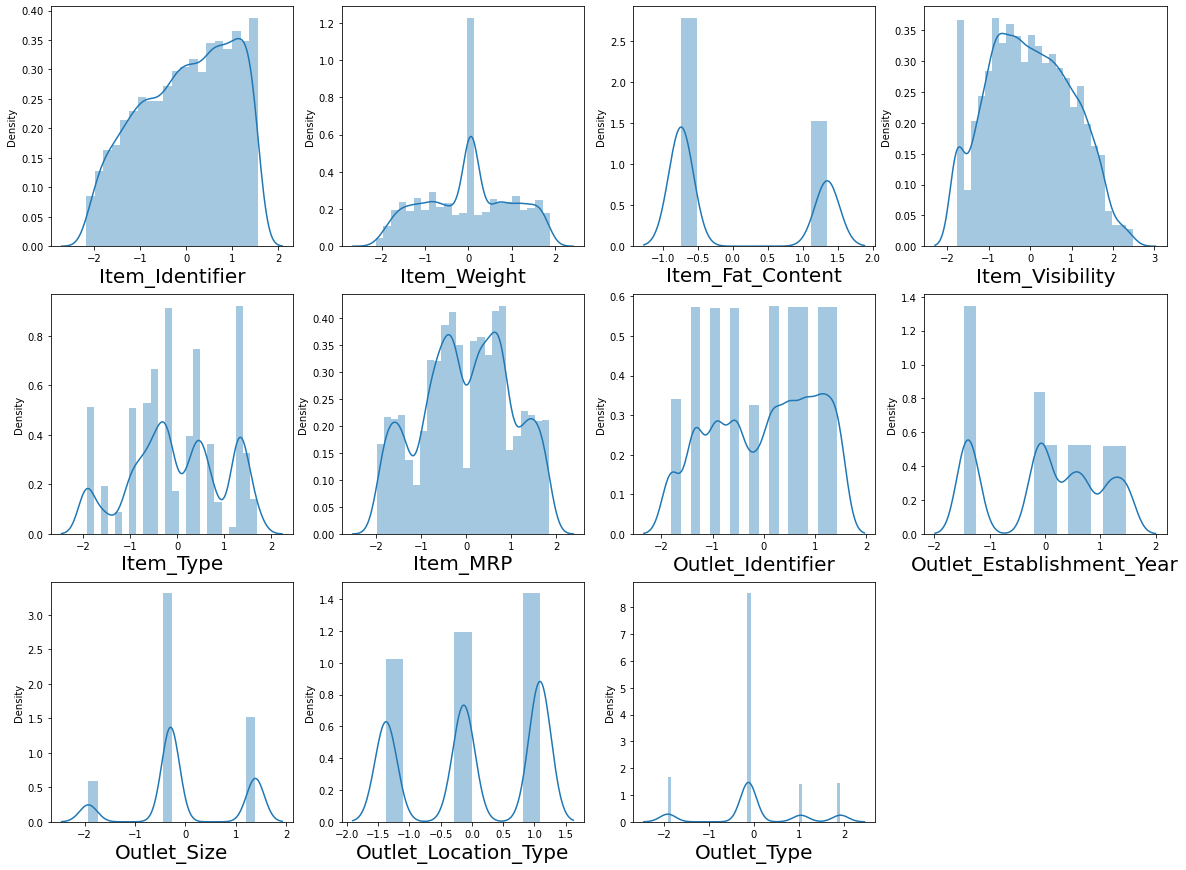

In [121]:
## Now check how data is visualize
plt.figure(figsize=(20,15))
graph=1
for columns in new_data:
    if graph<=11:
        ax =plt.subplot(3,4,graph)
        sns.distplot(new_data[columns])
        plt.xlabel(columns, fontsize = 20)
        graph+=1
plt.show()

In [122]:
new_data.skew()

Item_Identifier             -0.285982
Item_Weight                 -0.060915
Item_Fat_Content             0.609223
Item_Visibility              0.116776
Item_Type                   -0.167431
Item_MRP                    -0.111040
Outlet_Identifier           -0.214064
Outlet_Establishment_Year   -0.200515
Outlet_Size                 -0.042981
Outlet_Location_Type        -0.220642
Outlet_Type                  0.007830
dtype: float64

In [123]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaler = scaler.fit_transform(new_data)
print(x_scaler)

[[ 0.75746742  1.77007392 -0.74081066 ... -0.29345691 -1.37374464
  -0.12353311]
 [ 0.68861828 -1.03619283  1.34987258 ... -0.29345691 -0.13101959
  -0.12353311]
 [ 1.31359527  0.49167513 -0.74081066 ... -0.29345691  1.08829997
  -1.91575348]
 ...
 [ 1.32423381 -0.59355557 -0.74081066 ... -0.29345691 -0.13101959
  -0.12353311]
 [-0.47261831  0.64562931  1.34987258 ... -0.29345691 -0.13101959
  -0.12353311]
 [ 0.53315531 -0.72091914  1.34987258 ... -0.29345691 -0.13101959
  -0.12353311]]


In [124]:
import joblib
Sales_model= joblib.load("bigdatamart_Train[1].csv'.pkl")
prediction = Sales_model.predict(data)
prediction

array([2053.89337858, 1209.60920279, 2194.95555954, ..., 1832.80473841,
       3131.15413053, 1299.74403365])

In [125]:
Predicted_Iteam_Outlet_sales=pd.DataFrame({"Pred_Item_Outlet_Sales":prediction})
Predicted_Iteam_Outlet_sales

,Pred_Item_Outlet_Sales
0,2053.893379
1,1209.609203
2,2194.955560
3,2161.591272
4,4904.072169
...,...
5676,2257.929137
5677,2964.477531
5678,1832.804738
5679,3131.154131
